# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de dados: https://drive.google.com/drive/folders/1KSZ4UDM7BQcVbxHK3Z-NeZec6BRcaslH

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

### Importar a Base de dados

In [12]:
import pandas as  pd
                    # diretório do arquivo
tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Tratamento e limpeza de dados

In [2]:
print(tabela.info()) # Na tabela, não há nenhum erro a ser corrigido.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas.
- Vamos ver a correlação entre cada um dos itens, uma correlação negativa e/ou próxima de zero é desvantajosa, quanto mais próxima de 1, mais vantajosa é.

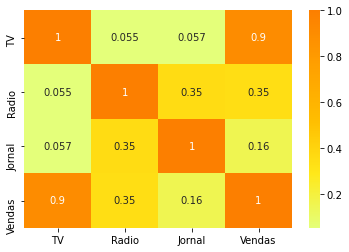

<function matplotlib.pyplot.show(close=None, block=None)>

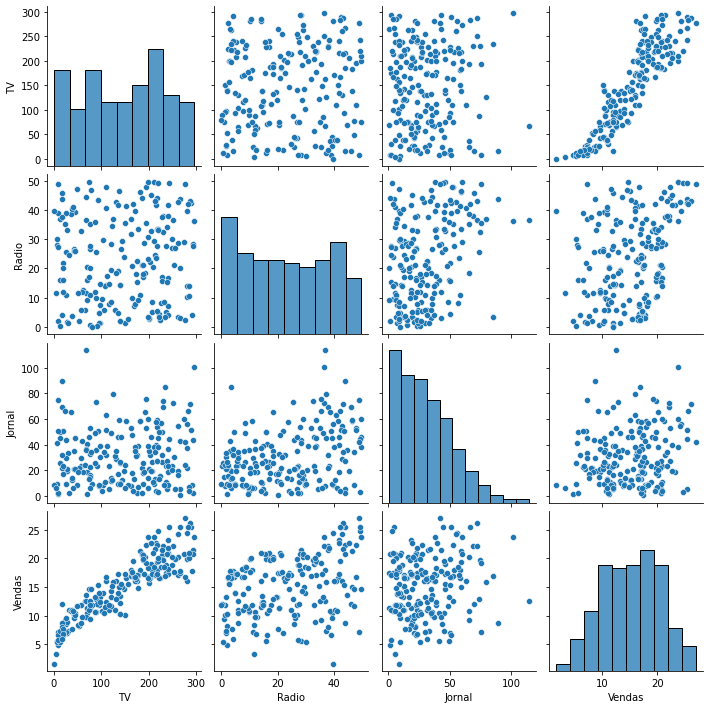

In [3]:
import seaborn as sns # Constrói gráficos com facilidade.
import matplotlib.pyplot as plt # Para exibir o gráfico sns

sns.heatmap(tabela.corr(), annot=True, cmap="Wistia") # corr = correlação, annot = pra aparecer o número da correlação, cmap = cor.
plt.show()

sns.pairplot(tabela)       # Claramente, as vendas da TV são as mais vantajosas (corr=0.9)
plt.show

### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [4]:
# Em uma tabela, x são as informações usadas para atingir o resultado, que é o y.
# x_treino = "simulado" para treinas a IA.
# x_teste = "prova" com novos valores adicionados a tabela para a IA calcular as previsões (resultado) e ver se aprendeu mesmo.
# y_treino = as previsões que a IA obteve no "simulado".
# y_teste = o gabarito da "prova".

# Para a IA conseguir fazer as previsões, a correlação entre os dados de x não podem ser muito parecidas, se forem muito parecidas, excluir alguma delas.

from sklearn.model_selection import train_test_split

y = tabela["Vendas"] # Determinou quem é o y da tabela (Vendas).
x = tabela.drop("Vendas", axis=1) # Determinou que o x da tabela é tudo menos as Vendas.

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1) # Esse comando separa quem é x,y,treino e teste da tabela.
                                                             # test_size = determina a porcentagem de dados que é pra ser usada.
                                                             # random state = para que os valores não sejam tão aleatórios.

### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [5]:
# Regressão Linear calcula e encontra um número.
# Árvore de decisão categoriza um número 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression() # Cria as IA's.
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino, y_treino) # fit = treina as IA's com o "simulado".
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

### Teste da IA e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % de precisão que o modelo obteve na "prova".

In [7]:
from sklearn import metrics

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste) # Passa a "prova" para as IA's calcularem a previsão.
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print(metrics.r2_score(y_teste, previsao_regressaolinear)) # Para mostrar o score que as IA's conseguiram na "prova".
print(f"{metrics.r2_score(y_teste, previsao_arvoredecisao):.2%}") # Para ficar bonitinho.
# A IA Árvore de Decisão acertou com mais precisão.

0.9071151423684273
96.60%


### Visualização Gráfica das Previsões

,y_teste,Previsoes ArvoreDecisao,Previsoes RegressaoLinear
58,23.8,23.186,21.288161
40,16.6,17.986,18.042132
34,11.9,12.859,10.059590
102,19.8,18.023,21.082241
184,17.6,20.006,20.764760
198,25.5,24.909,24.471874
95,16.9,16.964,16.806436
4,17.9,16.850,15.628857
29,10.5,11.216,10.124799
168,17.1,18.177,18.846019


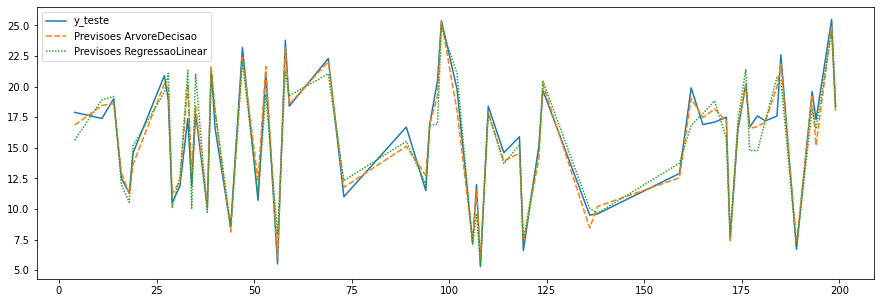

In [8]:
tabela_auxiliar = pd.DataFrame() # Cria uma tabela vazia.
tabela_auxiliar["y_teste"] = y_teste # Cria uma coluna.
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao # Cria uma coluna.
tabela_auxiliar["Previsoes RegressaoLinear"] = previsao_regressaolinear # Cria uma coluna.

display(tabela_auxiliar)

plt.figure(figsize=(15, 5)) # Para formatar o tamanho.
sns.lineplot(data=tabela_auxiliar) # Para passar a tabela em gráfico de linha.
plt.show()

### Qual a importância de cada variável para as vendas?

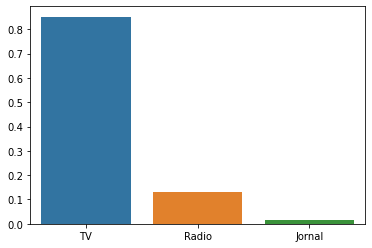

In [9]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()
# Mais fácil para analisar e então tomar uma decisão na empresa.

### Será que estamos investindo certo?

In [ ]:
# Investir mais em TV, pois a IA fez a previsão de que é a que mais dá lucro.